In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('🌼 Hello')

import os

csv_file_path = '/content/drive/MyDrive/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

#결측치(Missing Data)
print('전체 데이터 건수 : ',len(trade))

print('컬럼별 결측치 개수 :')
len(trade) - trade.count()

trade = trade.drop('기타사항',axis=1)
trade.head()

trade.isnull()
trade.isnull().any(axis=1)
trade[trade.isnull().any(axis=1)]

trade.dropna(how='all',subset=['수출건수','수출금액','수입건수','수입금액','무역수지'],inplace=True)
print('🌼 It\'s okay, no biggie')
trade[trade.isnull().any(axis=1)]

trade.loc[[188,191,194]]
trade.loc[191,'수출금액'] = (trade.loc[188,'수출금액']+trade.loc[194,'수출금액']/2)
trade.loc[[191]]

trade.loc[191,'무역수지'] = (trade.loc[191,'수출금액']+trade.loc[191,'수입금액'])
trade.loc[[191]]

🌼 Hello
전체 데이터 건수 :  199
컬럼별 결측치 개수 :
🌼 It's okay, no biggie


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,9593201.0,1141118.0,5038739.0,14631940.0


In [ ]:
trade.duplicated()
trade[trade.duplicated()]

trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [ ]:
trade.drop_duplicates(inplace=True)
print("🌼 It's okay, no biggie")

🌼 It's okay, no biggie


In [ ]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [ ]:
# 이상치 (Outlier) - anomaly detection
# using z score (by mean and std_deviation)
#  z core  가 특정 기준을 넘어가는 데이터에 대해 이상치라고 판단
# After detecting Outlier value -> delete / replace with other value / use binning

def outlier(df,col,z):
  return df[abs(df[col]-np.mean(df[col]))/np.std(df[col])>z].index
  # abs(df[col]-np.mean(df[col]))/np.std(df[col])>z : 데이터에서 평균을 빼준것에 절대값 / 표준편차 > z

print('🌼 It\'s okay, no biggie')

trade.loc[outlier(trade,'무역수지',1.5)]

🌼 It's okay, no biggie


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
123,2018년 06월,중국,257130.0,13814241.0,279023.0,8713018.0,5101223.0
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0
191,2020년 04월,미국,105360.0,9593201.0,1141118.0,5038739.0,14631940.0


In [ ]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index
print("🌼 It's okay, no biggie.")

trade.loc[not_outlier(trade, '무역수지', 1.5)]

🌼 It's okay, no biggie.


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


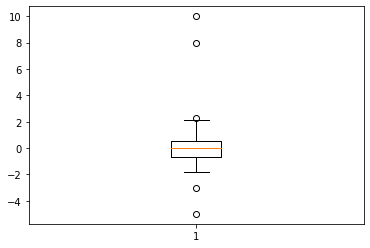

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [ ]:
# Another method for detecting outlier - IQR

np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

# IQR = Q3 - Q1
# If value v : Q1-1.5*IQR > v or Q3+1.5*IQR < v - > Outlier Value

Q3, Q1 = np.percentile(data,[75,25])
IQR = Q3 - Q1
IQR

data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

# what is the problem of z-score method?
# The z-score method realies on the mean and standard deviation of a gorup of data 
# but the mean and standard deviation are highly affected by outliers!
# For small dataset it's hard to detect outlier by z-score method

In [ ]:
def outlier2(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  return df[(df[col] < q1 - 1.5*iqr)|(df[col] > q3+1.5*iqr)]

outlier2(trade,'무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,9593201.0,1141118.0,5038739.0,14631940.0


In [ ]:
#nomalization

x = pd.DataFrame({'A':np.random.randn(100)*4+4,'B':np.random.randn(100)-1})

x

# Standardization 
x_standardization = (x - x.mean())/x.std()
x_standardization

# Min-Max scaling
x_min_max = (x - x.min())/(x.max() - x.min())
x_min_max

,A,B
0,0.306678,0.520370
1,1.000000,0.342819
2,0.302892,0.480569
3,0.357133,0.280272
4,0.884722,0.279940
...,...,...
95,0.657012,0.237693
96,0.571698,0.872638
97,0.772712,0.351426
98,0.807381,0.784517


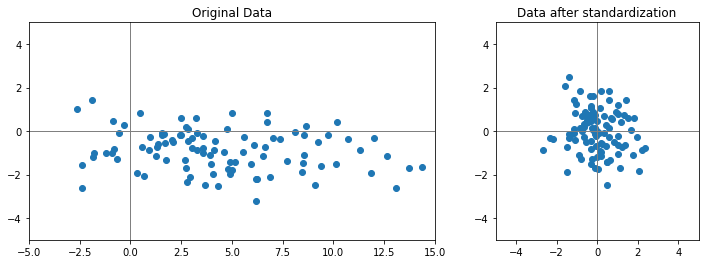

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

# standardization 기법으로 정규화를 했을때 분포가 어떻게 바뀌는지 보여주는 figure

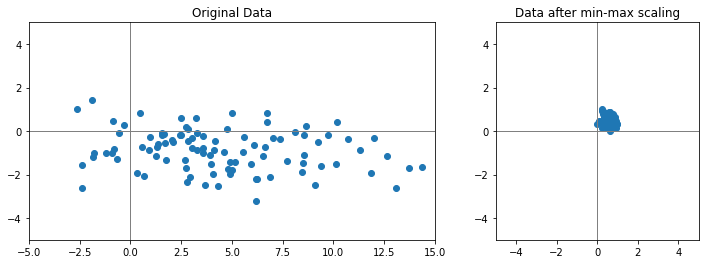

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()
# min-max scaling 기법으로 정규화를 했을때 분포가 어떻게 바뀌는지 보여주는 figure

In [ ]:
# Standardization data 'trade'
 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,-5.693451e-17,6.091993e-17,-8.312439e-17,-5.693451e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.234711e+00,-9.984408e-01,-1.276341e+00,-1.508124e+00
25%,-5.937426e-01,-1.044563e+00,-7.673625e-01,-7.911669e-01,-1.058586e+00
50%,-4.373265e-01,-1.609728e-01,-3.429346e-01,-4.137392e-01,1.281581e-01
75%,4.420459e-01,1.030973e+00,3.927781e-01,8.827841e-01,6.714310e-01
max,5.486317e+00,2.070686e+00,3.239068e+00,2.376092e+00,5.343357e+00


In [ ]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.373544,0.235620,0.349450,0.220116
std,0.156108,0.302536,0.235988,0.273790,0.145954
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.065612
50%,0.075271,0.324844,0.154691,0.236172,0.238822
75%,0.212548,0.685450,0.328311,0.591147,0.318114
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("🌼 It's okay, no biggie.")

🌼 It's okay, no biggie.


In [ ]:
# if  train data and test data are seperated
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)   
# test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")

train_min_max
test_min_max

💫 It's okay, no biggie...


,0,1
0,-0.25,0.55
1,0.00,1.00


In [ ]:
# scikit-learn 의 StandardScaler / MinMaxScaler 사용하는 방법
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

scaler.fit_transform(train)
scaler.transform(test)

# Also there are another way to do this : log transition

👽 It's okay, no biggie.


array([[-0.25,  0.55]])

In [ ]:
# One-Hot-Encoding : 형태소 분석 ? ? 
# 카테고리별 이진 특성을 만들어 해당하는 특성만 1 나머지는 0 
# 프레임 워크에서 범주형을 지원하지 않는 경우

print(trade['국가명'].head())


country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [ ]:
trade = pd.concat([trade,country],axis=1)
trade.head()

trade.drop(['국가명'],axis=1,inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.385333,0,0,1,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.270107,1,0,0,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.068170,0,1,0,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.328191,0,0,1,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.275084,1,0,0,1,0,0


In [ ]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("🌼 Almost there..")

🌼 Almost there..


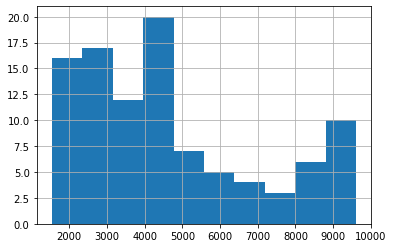

In [ ]:
# Data Binding / Bucketing

salary.hist()
# 연속적인 데이터를 구간을 나눠 분석할 때 사용

In [ ]:
bins = [0,2000,4000,6000,8000,10000]
print('🌼 Almost there..')

ctg = pd.cut(salary,bins=bins)
ctg

print('salary[0] : ',salary[0])
print('salary[0] 가 속한 카테고리 :',ctg[0])

ctg.value_counts().sort_index()

🌼 Almost there..
salary[0] :  4300
salary[0] 가 속한 카테고리 : (4000, 6000]


(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64